## CS 175: Topics in Computational Science - Probabilities, Distributions, and Stochastics
Professor: Roy Vincent L. Canseco, MSEE

Ray Justin O. Huang | SN: 2012 62256 | Date: January 25, 2017 | rayjustinhuang@gmail.com

# Balls Without Replacement Exercise
This is an assignment meant to show how the probabilities of certain empirically observable phenomena converge at their analytically derivable values as the number of trials increases.

### BALL PICKING ENGINE
Given a specified number of balls to take and a number of red, white, and black balls to take from, generates a tuple of drawn balls
of the format (reds, whites, blacks). By default, there are 7 red balls, 5 white balls, and 8 black balls to pick from.

In [2]:
from numpy import random

def BallPicker(take, red=7, white=5, black=8):
    R, W, B = 0, 0, 0
    for run in range(take):
        TotalBalls = red + white + black
        seed = random.randint(1,TotalBalls+1)
        if seed > red + white:
            B += 1
            black -= 1
        elif seed > red:
            W += 1
            white -= 1
        else:
            R += 1
            red -= 1
    return (R, W, B)

### Scenario 1: ONE OF EACH
Given a number of runs, returns the probability that the resulting draw turned out to have one of each colored ball. Assumes 3 balls are taken from the bag per draw.

In [3]:
def OneOfEach(runs):
    DesiredOutcomes = 0
    for i in range(runs):
        result = BallPicker(3)
        if result == (1,1,1):
            DesiredOutcomes += 1
    return DesiredOutcomes/runs

#### Analytical Solution for Scenario 1
Analytically, one can derive the solution for scenario 1 by using the following calculation, which relies on the hypergeometric distribution:

\begin{align}
P(R=1,W=1,B=1)=\frac{{7 \choose 1}{5 \choose 1}{8 \choose 1}}{20 \choose 3}=\frac{14}{57}\approx 24.57\%
\end{align}

### Scenario 2: AT LEAST ONE RED
Given a number of runs, returns the probability that the resulting draw turned out to have at least one red ball. Assumes 3 balls are taken from the bag per draw.

In [4]:
def AtLeastOneRed(runs):
    DesiredOutcomes = 0
    for i in range(runs):
        result = BallPicker(3)
        if result[0] >= 1:
            DesiredOutcomes += 1
    return DesiredOutcomes/runs

#### Analytical Solution for Scenario 2
Analytically, one can derive the solution for scenario 2 by using the following calculation, which also relies on the hypergeometric distribution:

\begin{align}
P(R\geq1)=1-\frac{{7 \choose 0}{13 \choose 3}}{20 \choose 3}=\frac{427}{570}\approx 74.91\%
\end{align}

### Plotting the Scenarios
Prepares the necessary axes and other parameters for plotting both bar charts. The aim is to demonstrate that the probabilities of the above two scenarios, when simulated, converage at their analytically derived values as the number of trial runs (or number of draws) increases.

Note: The x-axis consists of numbers 10 to 90 in increments of 10, 100 to 900 in increments of 100, 1000 to 9000 in increments of 1000, and 10000, 50000, 100000, 500000, and 1000000.

In [5]:
import matplotlib.pyplot as plt

xaxis = [i*10 for i in range(1,10)] + [i*100 for i in range(1,10)] + [i*1000 for i in range(1,10)] + [10**x for x in range(4,7)] + [5*(10**x) for x in range(4,6)]
xaxis.sort()
xaxislabels = [str(xaxis[i]) for i in range(len(xaxis))]

barwidths = [i for i in range(len(xaxis))]

yaxis1 = [ OneOfEach(xaxis[i]) for i in range(len(xaxis)) ]

yaxis2 = [ AtLeastOneRed(xaxis[i]) for i in range(len(xaxis)) ]

#### Plot 1 (Scenario 1: One of Each Ball)
A bar chart containing the probabilities of attaining one of each ball (assuming 3 balls taken per draw) vs. the number of draws.

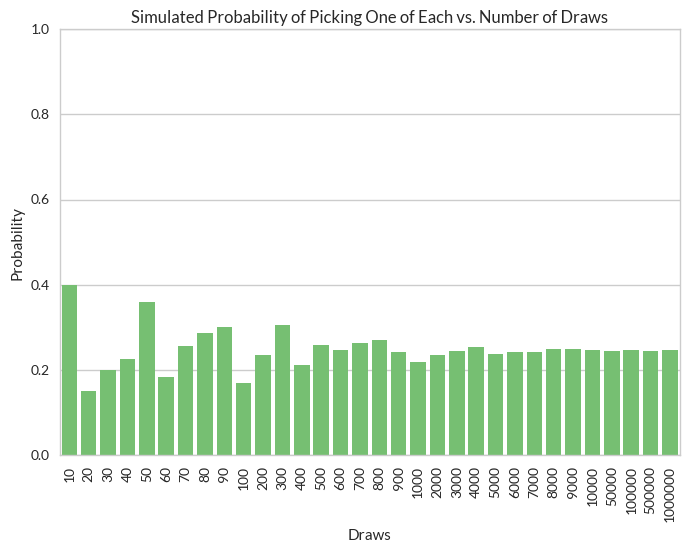

In [45]:
font = {'fontname':'Lato'}

import seaborn as sns

current_palette = sns.color_palette()

with sns.axes_style("whitegrid"):
    
    sns.set_palette(current_palette)
    sns.set_color_codes('muted')

    # plt.bar(barwidths, yaxis1, color='green', edgecolor='none')
    sns.barplot(xaxis, yaxis1, color='g', edgecolor='none')

    plt.ylabel("Probability", **font)
    plt.xlabel("Draws", **font)
    plt.title("Simulated Probability of Picking One of Each vs. Number of Draws", **font)
    plt.xticks(rotation="90", **font)
    plt.yticks(**font)
    axes = plt.gca()
    axes.set_ylim([0,1])
    # plt.autoscale()
    # x1,x2,y1,y2 = plt.axis()
    # plt.axis([x1,x2,0,1])

    # sns.barplot(x="draws", y="probability")
    sns.plt.show()

#### Plot 2 (Scenario 2: At Least One Red)
Below is a bar chart containing the probabilities of attaining at least one red (assuming 3 balls taken per draw) vs. the number of draws.

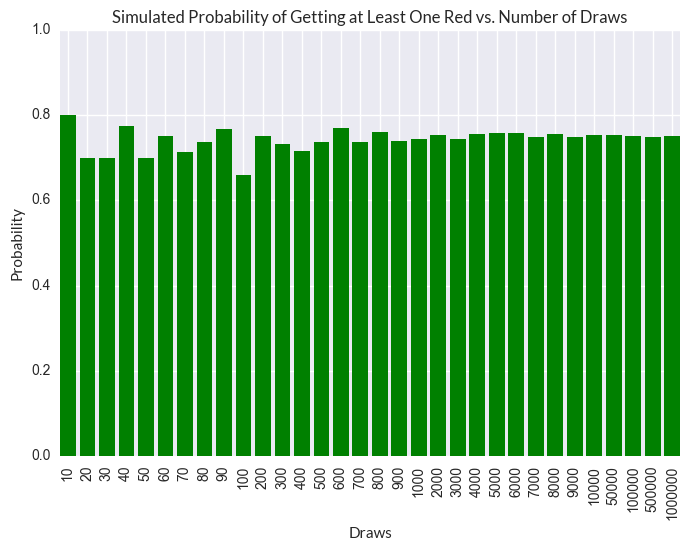

In [7]:
plt.bar(barwidths, yaxis2, color='green', edgecolor='none')

plt.ylabel("Probability", **font)
plt.xlabel("Draws", **font)
plt.title("Simulated Probability of Getting at Least One Red vs. Number of Draws", **font)
plt.xticks([i+0.4 for i in range(len(xaxislabels))], xaxislabels, rotation="90")
plt.autoscale()
x1,x2,y1,y2 = plt.axis()
plt.axis([x1,x2,0,1])
sns.plt.show()

### Conclusion
The above plots indeed appear to indicate that the respective probabilities converge to the values one can derive analytically:

For Scenario 1, the answer appears to converge at around 25%, which is close to 24.56% (or 14/57).

For Scenario 2, the answer appears to converge at around 75%, which is close to 74.91% (or 427/570).

### Appendix: Table of Data
Presented below is the data that corresponds to that contained in the two bar charts above, for easier viewing of the numerical information.

In [7]:
import pandas as pd

d = {'One of Each': yaxis1, 'At Least One Red': yaxis2}
df = pd.DataFrame(data=d, index=xaxis)
df = df[['One of Each','At Least One Red']]
# df.index.name = 'Draws'
# df.columns.name = 'Scenarios'
df.columns.name = 'Draws'
df

Draws,One of Each,At Least One Red
10,0.200000,0.500000
20,0.350000,0.750000
30,0.266667,0.633333
40,0.300000,0.675000
50,0.140000,0.800000
60,0.250000,0.816667
70,0.257143,0.742857
80,0.200000,0.725000
90,0.300000,0.744444
100,0.290000,0.760000
